In [235]:
# import the required libraries
import pandas as pd
import numpy as np

In [236]:
# import the walmart data set
wal_dataset = pd.read_csv('D://M_AI//Data Science with Python//Projects//Walmart//Walmart_Store_sales.csv')

In [237]:
# view the first five entried 
wal_dataset.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [260]:
# 1.TO FIND THE STORE WITH MAXIMUM SALES

# Create a DataFrame of Sum of Weekly Sales grouped by Store.
df1= pd.DataFrame({"Sum_sales":wal_dataset.groupby(wal_dataset.Store).sum()["Weekly_Sales"]})
print(df1.head())

# Find the maximum sales.
max_sales=np.max(df1.Sum_sales)
target= any(df1.Sum_sales==max_sales)

# Find the store with maximum sales.
store_max_sales= df1[df1.Sum_sales==max_sales]

print(max_sales)
print(store_max_sales)
# Answer: Store 20 has the maximum sales

          Sum_sales
Store              
1      2.224028e+08
2      2.753824e+08
3      5.758674e+07
4      2.995440e+08
5      4.547569e+07
301397792.46000004
          Sum_sales
Store              
20     3.013978e+08


In [239]:
# Find the store counts
wal_dataset['Store'].value_counts()


43    143
41    143
33    143
29    143
25    143
21    143
17    143
13    143
9     143
5     143
1     143
44    143
40    143
36    143
32    143
28    143
24    143
20    143
16    143
12    143
8     143
37    143
45    143
39    143
2     143
35    143
31    143
27    143
23    143
19    143
15    143
11    143
7     143
3     143
42    143
38    143
34    143
30    143
26    143
22    143
18    143
14    143
10    143
6     143
4     143
Name: Store, dtype: int64

In [240]:
# 2. TO FIND STORE WITH MAXIMUM STANDARD DEVIATION

#  Find the standard deviation of each stores
aggg = np.std
df2 = pd.DataFrame({'Std_sales':wal_dataset.groupby(wal_dataset.Store)['Weekly_Sales'].agg(aggg)})
print(df2)

# Find the Maximum Deviation
max_dev= np.max(df2.Std_sales)
store_max_dev= df[df2.Std_sales==max_dev]
print(store_max_dev)

# Answer = Store 14 has maximum Standard Deviation

           Std_sales
Store               
1      155980.767761
2      237683.694682
3       46319.631557
4      266201.442297
5       37737.965745
6      212525.855862
7      112585.469220
8      106280.829881
9       69028.666585
10     302262.062504
11     165833.887863
12     139166.871880
13     265506.995776
14     317569.949476
15     120538.652043
16      85769.680133
17     112162.936087
18     176641.510839
19     191722.638730
20     275900.562742
21     128752.812853
22     161251.350631
23     249788.038068
24     167745.677567
25     112976.788600
26     110431.288141
27     239930.135688
28     181758.967539
29      99120.136596
30      22809.665590
31     125855.942933
32     138017.252087
33      24132.927322
34     104630.164676
35     211243.457791
36      60725.173579
37      21837.461190
38      42768.169450
39     217466.454833
40     119002.112858
41     187907.162766
42      50262.925530
43      40598.413260
44      24762.832015
45     130168.526635
           St

In [241]:
# 2.2 Finding the coefficicent of mean to standard deviation
agg2=(np.mean)
df3= pd.DataFrame({"Mean_sales":wal_dataset.groupby(wal_dataset.Store)["Weekly_Sales"].agg(agg2)})
print(df3)

df4=pd.merge(left=df3,right=df2,how='outer', left_index=True, right_index=True)
df4["Coefficient"]= df4.Std_sales/df4.Mean_sales
print(df4)



         Mean_sales
Store              
1      1.555264e+06
2      1.925751e+06
3      4.027044e+05
4      2.094713e+06
5      3.180118e+05
6      1.564728e+06
7      5.706173e+05
8      9.087495e+05
9      5.439806e+05
10     1.899425e+06
11     1.356383e+06
12     1.009002e+06
13     2.003620e+06
14     2.020978e+06
15     6.233125e+05
16     5.192477e+05
17     8.935814e+05
18     1.084718e+06
19     1.444999e+06
20     2.107677e+06
21     7.560691e+05
22     1.028501e+06
23     1.389864e+06
24     1.356755e+06
25     7.067215e+05
26     1.002912e+06
27     1.775216e+06
28     1.323522e+06
29     5.394514e+05
30     4.385796e+05
31     1.395901e+06
32     1.166568e+06
33     2.598617e+05
34     9.667816e+05
35     9.197250e+05
36     3.735120e+05
37     5.189003e+05
38     3.857317e+05
39     1.450668e+06
40     9.641280e+05
41     1.268125e+06
42     5.564039e+05
43     6.333247e+05
44     3.027489e+05
45     7.859814e+05
         Mean_sales      Std_sales  Coefficient
Store       

In [242]:
# Convert from object type to datetime type
wal_dataset['Date'] = pd.to_datetime(wal_dataset['Date'])
wal_dataset['Date']

0      2010-05-02
1      2010-12-02
2      2010-02-19
3      2010-02-26
4      2010-05-03
          ...    
6430   2012-09-28
6431   2012-05-10
6432   2012-12-10
6433   2012-10-19
6434   2012-10-26
Name: Date, Length: 6435, dtype: datetime64[ns]

In [243]:
# extract year
wal_dataset["Years"]= wal_dataset.Date.apply(lambda x : x.year)

In [244]:
# extract month
wal_dataset["Months"]= wal_dataset.Date.apply(lambda x : x.month)

In [245]:
# extract day
wal_dataset["Days"]= wal_dataset.Date.apply(lambda x : x.timetuple().tm_yday)


In [246]:
wal_dataset.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Years,Months,Days
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,122
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,336
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,50
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,57
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,123


In [257]:
# 3. STORE WHICH AS MAXIMUM QUARTERLY GROWTH FOR Q3 2012

def find_q3(x):
    if( x.month>8 and x.year==2012):
        return True
    else:
        return False

def find_q2(x):
    if( x.month>4 and x.month<8 and x.year==2012):
        return True
    else:
        return False
    

q3= wal_dataset[wal_dataset.Date.apply(find_q3)].groupby(["Store"]).agg({"Weekly_Sales":'mean'})
q2= wal_dataset[wal_dataset.Date.apply(find_q2)].groupby(["Store"]).agg({"Weekly_Sales":'mean'})

quaterly_growth= (q3-q2)
print(quaterly_growth[quaterly_growth.Weekly_Sales==quaterly_growth.Weekly_Sales.max()])

# Answer: Store 12 has the maximum 3rd quaterly growth in 2012

       Weekly_Sales
Store              
12         5316.855


In [248]:
# 4. FINDING THE HOLIDAYS WHICH HAS SALES MORE THAN THE MEAN SALES OF NON-HOLIDAYS

mean_all= wal_dataset[wal_dataset.Holiday_Flag==0].agg({"Weekly_Sales":'mean'})
print(mean_all)

def find_sale(x):
    if(x==1 ):
        
        return True
    else:
        return False

def abc(x):
    if(x>mean_all[0]):
        return True
    else:
        return False

holiday = wal_dataset[wal_dataset.Holiday_Flag==1].loc[wal_dataset.Weekly_Sales.apply(abc)]
print(holiday)
holiday.set_index("Store", inplace=True)
print(holiday[["Date"]])

# The above rows and columns give sales more than non- holiday sales.

Weekly_Sales    1.041256e+06
dtype: float64
      Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
1         1 2010-12-02    1641957.44             1        38.51       2.548   
31        1 2010-10-09    1507460.69             1        78.69       2.565   
42        1 2010-11-26    1955624.11             1        64.52       2.735   
47        1 2010-12-31    1367320.01             1        48.43       2.943   
53        1 2011-11-02    1649614.93             1        36.39       3.022   
...     ...        ...           ...           ...          ...         ...   
5819     41 2011-12-30    1264014.16             1        34.12       3.119   
5825     41 2012-10-02    1238844.56             1        22.00       3.103   
5855     41 2012-07-09    1392143.82             1        67.41       3.596   
6334     45 2010-11-26    1182500.16             1        46.15       3.039   
6386     45 2011-11-25    1170672.94             1        48.71       3.492   

       

In [249]:
# 5. MONTHLY SALES AND SEMESTER SALES

yearly_sales = wal_dataset.groupby('Years').agg({'Weekly_Sales':'sum'})
monthly_sales = wal_dataset.groupby('Months').agg({'Weekly_Sales':'sum'})
print(yearly_sales, monthly_sales)

       Weekly_Sales
Years              
2010   2.288886e+09
2011   2.448200e+09
2012   2.000133e+09         Weekly_Sales
Months              
1       4.264263e+08
2       5.220257e+08
3       5.534864e+08
4       6.453239e+08
5       6.056966e+08
6       5.750180e+08
7       5.933139e+08
8       5.642317e+08
9       5.905323e+08
10      6.029189e+08
11      4.591693e+08
12      5.990761e+08


     Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0        1 2010-05-02    1643690.90             0        42.31       2.572   
1        1 2010-12-02    1641957.44             1        38.51       2.548   
2        1 2010-02-19    1611968.17             0        39.93       2.514   
3        1 2010-02-26    1409727.59             0        46.63       2.561   
4        1 2010-05-03    1554806.68             0        46.50       2.625   
..     ...        ...           ...           ...          ...         ...   
138      1 2012-09-28    1437059.26             0        76.08       3.666   
139      1 2012-05-10    1670785.97             0        68.55       3.617   
140      1 2012-12-10    1573072.81             0        62.99       3.601   
141      1 2012-10-19    1508068.77             0        67.97       3.594   
142      1 2012-10-26    1493659.74             0        69.16       3.506   

            CPI  Unemployment  Years  Months  Days  
0    211.0

Text(0, 0.5, 'Monthly_Sales')

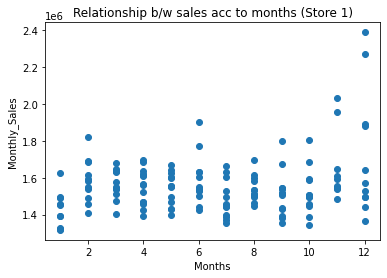

In [250]:
# 6. ANALYZING THE SALES PLOT AND BUILDING A MODEL USING LINEAR REGRESSION

import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

store1=wal_dataset[wal_dataset.Store==1]
print(store1)

plt.scatter(store1.Months, store1.Weekly_Sales)
plt.title("Relationship b/w sales acc to months (Store 1)")
plt.xlabel("Months")
plt.ylabel("Monthly_Sales")

In [251]:
# import libraries for linear regression and training a model

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_feature = wal_dataset[['Store','Temperature','Fuel_Price', 'CPI','Unemployment','Days','Holiday_Flag']]
Y_target = wal_dataset['Weekly_Sales']

linReg = LinearRegression()

# initialise the train and test datasets
X_train,X_test,Y_train,Y_test = train_test_split(X_feature,Y_target,test_size=0.30,random_state=100)

# fit the training data to the regression model
linReg.fit(X_train,Y_train)

# predict the outcome
y_pred = linReg.predict(X_test)

print(y_pred)
print(X_test)


[1126413.95704177 1250273.95383603  722292.34960193 ...  883817.92825324
 1250277.83262479  673630.59428836]
      Store  Temperature  Fuel_Price         CPI  Unemployment  Days  \
2704     19        73.41       3.819  138.173581         8.193    68   
2346     17        34.48       3.407  128.512193         6.866    77   
5200     37        46.68       2.989  211.333375         8.395    92   
3483     25        18.92       3.237  205.389495         7.343    28   
349       3        76.91       3.807  218.851237         7.574   112   
...     ...          ...         ...         ...           ...   ...   
4457     32        75.69       2.691  189.774698         9.017   204   
4138     29        71.93       3.884  138.377194         9.419   244   
5972     42        57.65       3.963  130.741379         7.545   247   
3050     22        28.49       3.177  136.665265         8.572   365   
5448     39        77.49       2.854  209.118536         8.464   134   

      Holiday_Flag  
2704 

In [252]:
print('the variance score is %.3f'%linReg.score(X_test,Y_test))

the variance score is 0.144


In [253]:
confusion_matrix = pd.crosstab(Y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix)

Predicted   5.319176e+05  5.361617e+05  5.637923e+05  5.681037e+05  \
Actual                                                               
209986.25              0             0             0             0   
213538.32              0             0             0             0   
229731.98              0             0             0             0   
231155.90              0             0             0             0   
233543.08              0             0             0             0   
...                  ...           ...           ...           ...   
2950198.64             0             0             0             0   
3436007.68             0             0             0             0   
3556766.03             0             0             0             0   
3595903.20             0             0             0             0   
3676388.98             0             0             0             0   

Predicted   5.724545e+05  5.731359e+05  5.759916e+05  5.769508e+05  \
Actual             

In [254]:
# Date is converted to number of days
df_dt_dy = wal_dataset[['Date','Days']]
df_dt_dy

,Date,Days
0,2010-05-02,122
1,2010-12-02,336
2,2010-02-19,50
3,2010-02-26,57
4,2010-05-03,123
...,...,...
6430,2012-09-28,272
6431,2012-05-10,131
6432,2012-12-10,345
6433,2012-10-19,293


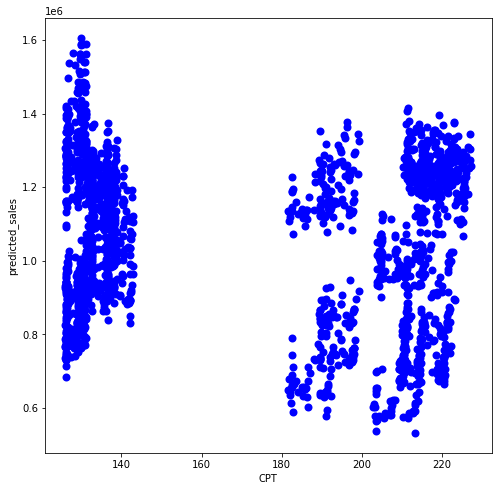

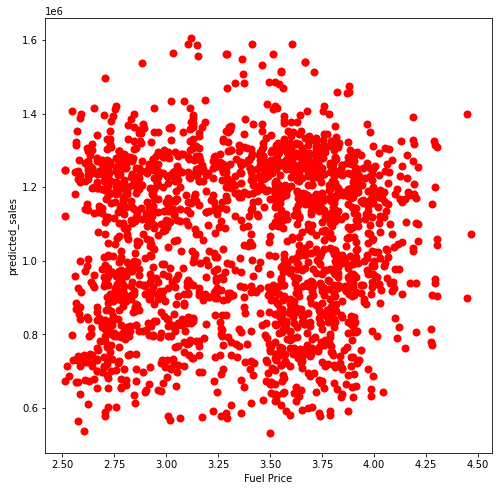

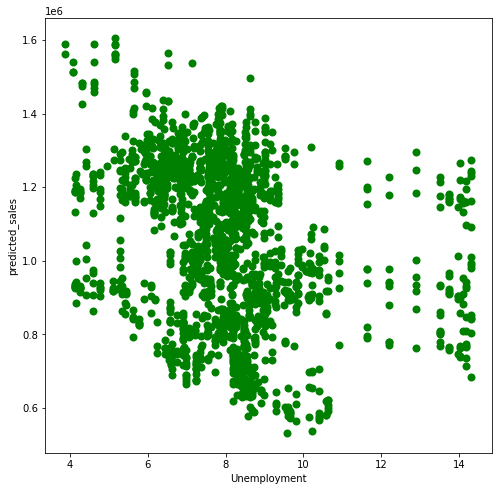

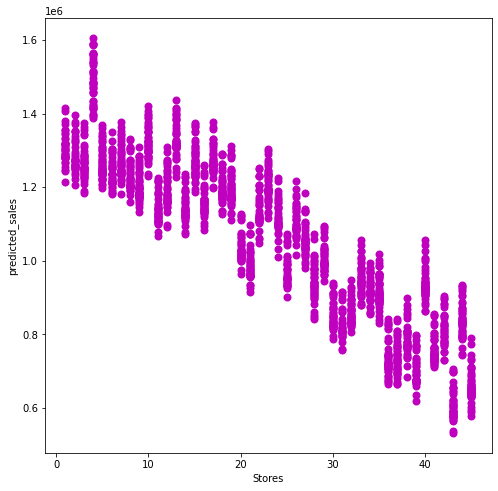

In [255]:
# Predicted sales dependency with CPI 
plt.figure(figsize=(8,8))
plt.scatter(X_test['CPI'],y_pred,color='b',linewidth=2)
plt.xlabel('CPT')
plt.ylabel('predicted_sales')
plt.show()

# Predicted sales dependency with Fuel_Price
plt.figure(figsize=(8,8))
plt.scatter(X_test['Fuel_Price'],y_pred,color='r',linewidth=2)
plt.xlabel('Fuel Price')
plt.ylabel('predicted_sales')
plt.show()

# Predicted sales dependency with Unemployment
plt.figure(figsize=(8,8))
plt.scatter(X_test['Unemployment'],y_pred,color='g',linewidth=2)
plt.xlabel('Unemployment')
plt.ylabel('predicted_sales')
plt.show()

# Predicted Sales for Different Stores
plt.figure(figsize=(8,8))
plt.scatter(X_test['Store'],y_pred,color='m',linewidth=2)
plt.xlabel('Stores')
plt.ylabel('predicted_sales')
plt.show()